<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/05_kNN_CT_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [0]:
import cv2
import glob
import imageio 
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
link_Covid_train = "/content/drive/My Drive/Datasets/CT_Covid19/CT_Covid_Train/*"
link_nonCovid_train = "/content/drive/My Drive/Datasets/CT_Covid19/CT_Non_Covid_Train/*"
link_Covid_test =  "/content/drive/My Drive/Datasets/CT_Covid19/CT_Covid_Test/*"
link_nonCovid_test = "/content/drive/My Drive/Datasets/CT_Covid19/CT_Non_Covid_Test/*"

# 1 . Load data

In [0]:
X_train = []
X_test = []
y_train = []
y_test = []

In [0]:
def load_data(path, X, y, result):
    for im_path in glob.glob(path):
        cv_img = cv2.imread(im_path);     
        gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)   
        img = cv2.resize(gray,(28,28))   
        X.append(img)
        y.append(result)

In [0]:
load_data(link_Covid_train, X_train, y_train, 1)

In [0]:
load_data(link_nonCovid_train, X_train, y_train, 0)

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(600, 28, 28)

In [10]:
y_train.shape

(600,)

In [0]:
load_data(link_Covid_test, X_test, y_test, 1)

In [0]:
load_data(link_nonCovid_test, X_test, y_test, 0)

In [0]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [14]:
X_test.shape

(146, 28, 28)

In [15]:
y_test.shape

(146,)

# 2 . Statistic data

In [16]:
Counter(y_train)

Counter({0: 300, 1: 300})

In [17]:
Counter(y_test)

Counter({0: 97, 1: 49})

# 3 . Visualize data

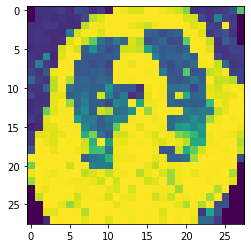

In [18]:
#Visulize random image
img = X_train[0,:]
plt.imshow(img)

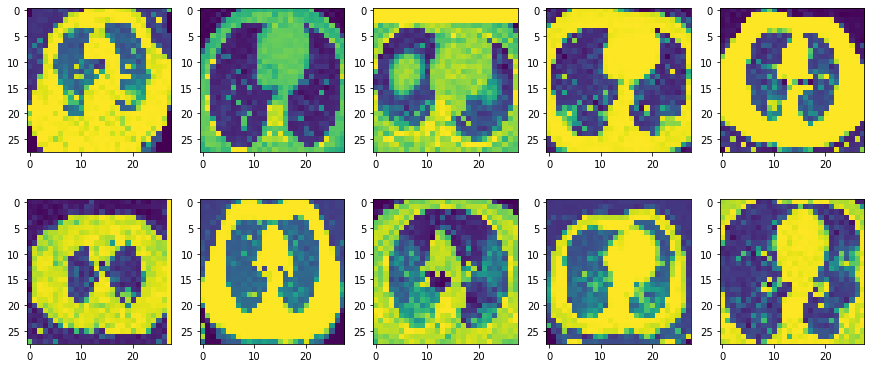

In [19]:
#Visualize top 10 positive in train data
index = np.where(y_train == 1)[0][:10]
plt.figure(figsize = (15,10))
for i, j in enumerate(index):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[j])

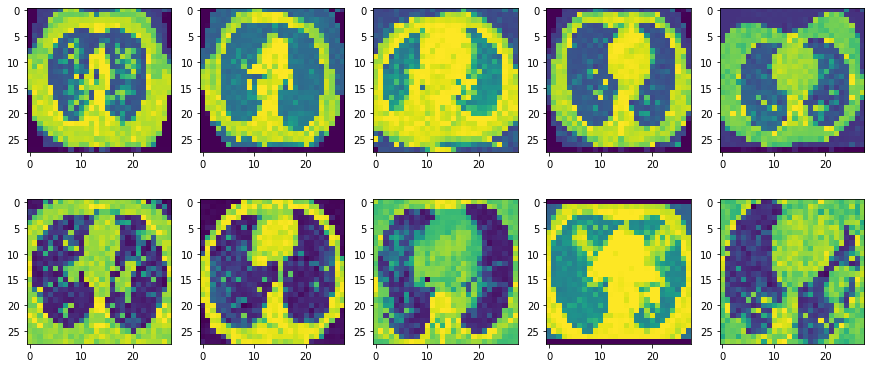

In [20]:
#Visualize top 10 negative in train data
index = np.where(y_train == 0)[0][:10]
plt.figure(figsize = (15,10))
for i, j in enumerate(index):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[j])

# 4 . Normalize data

In [21]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train.shape

(600, 784)

In [22]:
y_train  = y_train.reshape(-1,1)
y_train.shape

(600, 1)

In [23]:
X_test = X_test.reshape(X_test.shape[0], -1)
X_test.shape

(146, 784)

In [24]:
y_test = y_test.reshape(-1, 1)
y_test.shape

(146, 1)

# 5 . Build model

In [25]:
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [0]:
y_train_pred = model.predict(X_train)

In [0]:
y_test_pred = model.predict(X_test)

# 5 . Visualize result

# 6 . Evaluate

Train data

Accuracy score:  0.7833333333333333
Confusion matrix: 
 [[279  21]
 [109 191]]


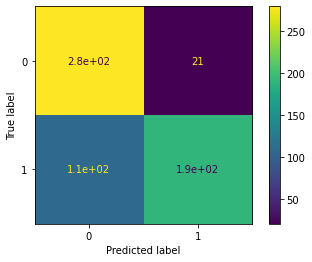

In [28]:
print('Accuracy score: ', accuracy_score(y_train, y_train_pred))
print('Confusion matrix: \n', confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(model, X_train, y_train)

Test data

Accuracy score:  0.7054794520547946
Confusion matrix: 
 [[86 11]
 [32 17]]


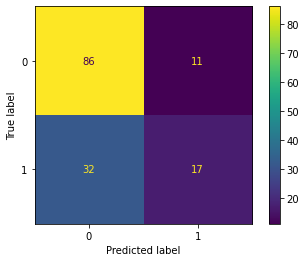

In [29]:
print('Accuracy score: ', accuracy_score(y_test, y_test_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(model, X_test, y_test)